# Two Body Orbit
This code solves for the motion of two bodies due to gravitational attraction.  We solve for the differential equations using the Lagrangian method, and impliment this in the `Orbit` class.

Here, our Lagrangian is the same as it ever was:

$\mathcal{L} = T - U$

Where T is the total kinetic energy and U is the total potential energy. Our total kinetic energy is from the motion of the two bodies while the potential energy is from their gravitation attraction.  Thus, we can find our Lagrangian to be expressed as:

$\mathcal{L} = \frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2 + \frac{G m_1 m_2}{r}$

where $m_1$ and $m_2$ are the masses of the bodies, $v_1$ and $v_2$ are the respective velocities, r is the distance between them, and G is the gravitational constant. However, as we want to express this in Cartesian coordinates, we want to express $v_1$ and $v_2$ in terms of their x and y components. Therefore, we have

$\mathcal{L} = \frac{1}{2} m_1 (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} m_2 (\dot x_1^2 + \dot y_1^2) + \frac{G m_1 m_2}{r}$, and $r = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

Now that we have or Lagranian expression, we can solve for the differential equations for $x_1$, $y_1$, $x_2$, and $y_2$. Beginning with $x_1$, we we can solve this with

$\frac{\delta}{\delta t}\big(\frac{\delta \mathcal{L}}{\delta \dot x_1}\big) = \frac{\delta \mathcal{L}}{\delta x_1}$

Taking this peice by peice,

$\frac{\delta}{\delta t}\big(\frac{\delta \mathcal{L}}{\delta \dot x_1}\big) = m_1 \ddot x_1 $

and

$\frac{\delta \mathcal{L}}{\delta x_1} = -Gm_1m_2(x_1-x_2)\big((x_1-x_2)^2+(y_1-y_2)^2\big)^{-3/2}$.

Therefore we find

$\ddot x_1 = -Gm_2(x_1-x_2)\big((x_1-x_2)^2+(y_1-y_2)^2\big)^{-3/2}$.

Similarly, we find

$\ddot y_1 = -Gm_2(y_1-y_2)\big((x_1-x_2)^2+(y_1-y_2)^2\big)^{-3/2}$

$\ddot x_2 = Gm_1(x_1-x_2)\big((x_1-x_2)^2+(y_1-y_2)^2\big)^{-3/2}$

$\ddot y_2 = Gm_1(y_1-y_2)\big((x_1-x_2)^2+(y_1-y_2)^2\big)^{-3/2}$

These differential equations can be solved in the `Orbit` class.  The orbit class takes input for the initial positions of the masses and their initial velocities in Cartesian form. They will be returned from the `dy_dt` function and passed into the `solve_ode` function, which utalizes `solve_ivp`


In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

In [3]:
class Orbit():
    def __init__(self, G = 1., m1 = 10., m2 = 10.):
        self.G = G
        self.m1 = m1
        self.m2 = m2
        
    def dy_dt(self, t, y):

        x1, x2, y1, y2, vx1, vx2, vy1, vy2 = y
        
        x1_dot = vx1
        x2_dot = vx2
        y1_dot = vy1
        y2_dot = vy2
        
        r = (x1-x2)**2 + (y1-y2)**2
        
        d = r**(3/2)
        
        x1_ddot = -self.G * self.m2 * (x1-x2) / d
        x2_ddot = self.G * self.m1 * (x1-x2) / d
        y1_ddot = -self.G * self.m2 * (y1-y2) / d
        y2_ddot = self.G * self.m1 * (y1-y2) / d
        
        return x1_dot, x2_dot, y1_dot, y2_dot, x1_ddot, x2_ddot, y1_ddot, y2_ddot 
        
    def solve_ode(self, t_pts, x1_0, x2_0, y1_0, y2_0, vx1_0, vx2_0, vy1_0, vy2_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, x2_0, y1_0, y2_0, vx1_0, vx2_0, vy1_0, vy2_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x1, x2, y1, y2, vx1, vx2, vy1, vy2 = solution.y

        return x1, x2, y1, y2, vx1, vx2, vy1, vy2

In [4]:
t_start = 0.
t_end = 1000.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)


G = 1.
m1 = 10.
m2 = 10.

Or1 = Orbit(G = G, m1 = m1, m2 = m2)

In [5]:
x1_0 = -3.5
vx1_0 = -0.5

x2_0 = 1.5
vx2_0 = -(m1/m2) * vx1_0

y1_0 = 0. 
vy1_0 = 1.

y2_0 = -1.5
vy2_0 = -(m1/m2) * vy1_0

x1, x2, y1, y2, vx1, vx2, vy1, vy2 = Or1.solve_ode(t_pts, x1_0, x2_0, y1_0, y2_0, vx1_0, vx2_0, vy1_0, vy2_0)

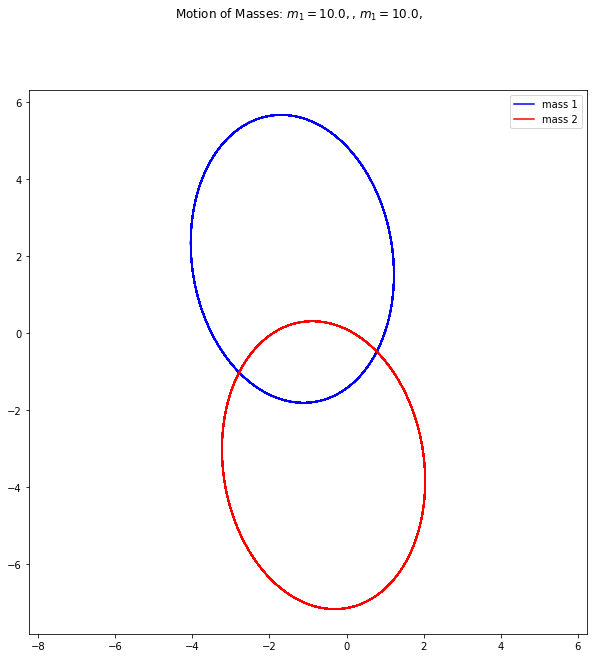

In [6]:
fig = plt.figure(figsize=(10,10))
overall_title = rf'Motion of Masses: $m_1 = {m1:.1f},$ $m_1 = {m2:.1f},$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)
ax_a.plot(x1, y1, color = 'blue', label = 'mass 1')
ax_a.plot(x2, y2, color = 'red', label = 'mass 2')
ax_a.axis('equal')
ax_a.legend(loc = 'upper right')

Above shows the motion of the two masses, each set to 10.  We see that they fall into an orbit with the given the inital position of $m_1$ is (-3.5, 0),  $v_1$ = (-0.5, 1), and the position of $m_2$ = (1.5, -1.5), and $v_2$ = (0.5, -1). Their orbit is slightly eliptical here.

We will now see how they behave when one mass is much larger than the other.  We will keep the inial conditions the same, despite setting $m_1$ to 10000 and keeping $m_2$ at 10.

In [7]:
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)


G = 1.
m1 = 1000.
m2 = 10.

Or1 = Orbit(G = G, m1 = m1, m2 = m2)

In [8]:
x1_0 = -3.5
vx1_0 = 0.

x2_0 = 10
vx2_0 = -1

y1_0 = 0. 
vy1_0 = 0.

y2_0 = 0
vy2_0 = -1

x1, x2, y1, y2, vx1, vx2, vy1, vy2 = Or1.solve_ode(t_pts, x1_0, x2_0, y1_0, y2_0, vx1_0, vx2_0, vy1_0, vy2_0)

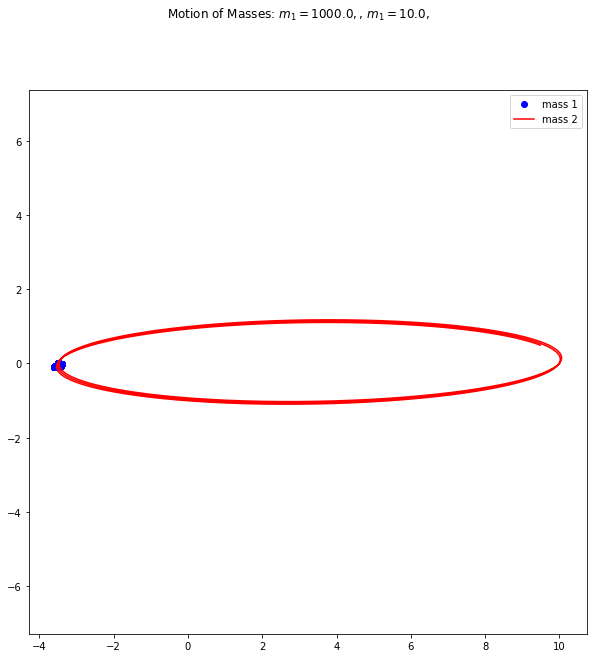

In [9]:
fig = plt.figure(figsize=(10,10))
overall_title = rf'Motion of Masses: $m_1 = {m1:.1f},$ $m_1 = {m2:.1f},$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)
ax_a.plot(x1, y1,'o', color = 'blue', label = 'mass 1')
ax_a.plot(x2, y2, color = 'red', label = 'mass 2')
ax_a.axis('equal')
ax_a.legend(loc = 'upper right')

This shows the motion when one mass is much larger than the other. $m_1$ is 100 times larger than $m_2$, and has no initial velocity.  $m_2$ is given an itianl velocity of (-1,-1), ans is quickly pulled in towards $m_1$. We see that $m_2$ orbits around $m_1$, while $m_1$ is only slightly affected by the other's orbit.  